**Enter your name:**  Phillip McDonough

**Enter your PID:**  906263051

I have neither given nor received unauthorized assistance on this assignment.  See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

### Question

What distinct events or trending topics occurred at various times during the time period covered by the provided tweets?

### Rationale

1. We want to investigate VT tweets to see if we can identify any trends or events that happened during different time periods.

### Data

Our data contains tweets that include the strings "Virginia Tech" and/or the hashtag "#Hokies". These tweets were scraped between November 6 and 14 (the GMT timestamps extend to November 15) and come in a pre-cleaned json file provided by the instructor. We will use Pandas to import the file in to a DataFrame.

In [26]:
# import pandas as pd
import itertools 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create a DataFrame of tweets and adds a bag column
tweets = pd.read_json('VT_tweets_2021Nov.json')
tweets["text"] = tweets.text.map(lambda txt: txt.encode('ascii','ignore').decode())
tweets["bag"] = tweets.text.map(lambda t: t.replace(',',' ').lower().split())

# aggregate the tweets by date
tweets.timestamp = tweets.timestamp.map(lambda x: str(x).split()[0])
datesGB = tweets.groupby("timestamp")
dates = datesGB.bag.aggregate(lambda listOfBags: list(itertools.chain.from_iterable(listOfBags)))

# computes a Vector Space Model matrix using TF-IDF
TF = dates.apply(lambda bag: pd.Series(bag).value_counts())
IDF = np.log(len(TF)/TF.count())
TFIDF = TF * IDF
TFIDF.fillna(0.0, inplace=True)
TFIDF

,the,virginia,tech,to,in,a,and,at,of,#hokies,...,https://t.co/ensw59occm,https://t.co/p8zaakkabv,@flynn1cooper,https://t.co/ii3sv4ursz,grands,@lilpastagoblin,ore,journalism,existed,share!
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-11-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now we have aggregated the tweets by date and computed a vector space model matrix using TF-IDF. From here we can conduct text analysis to see if there are any distinct events or trending topics that can be found from the matrix. We will first need to find the top 30 terms used each day and plot the results.

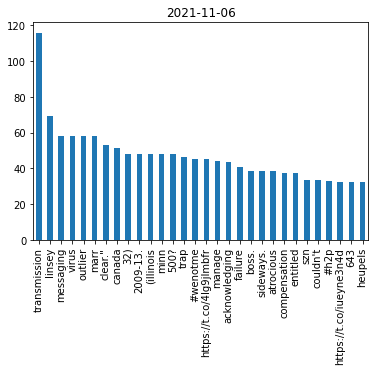

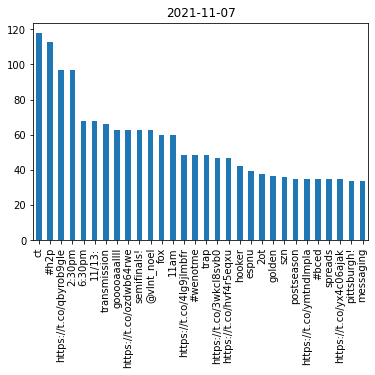

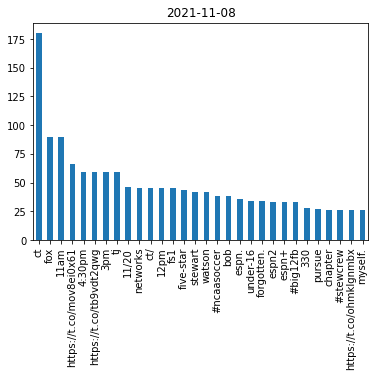

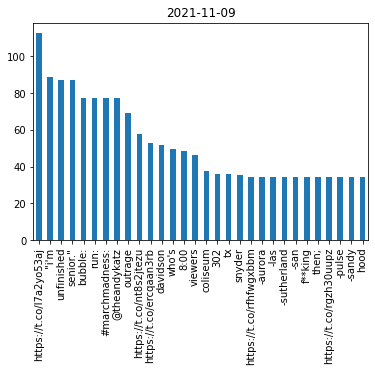

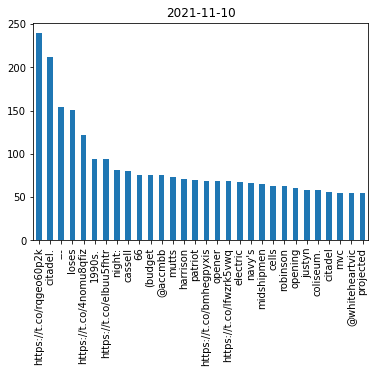

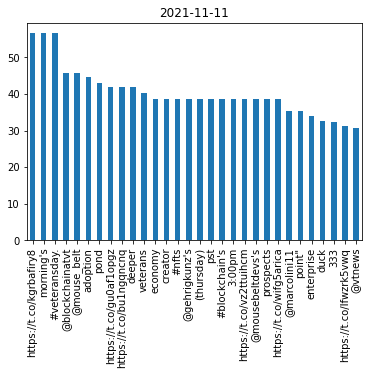

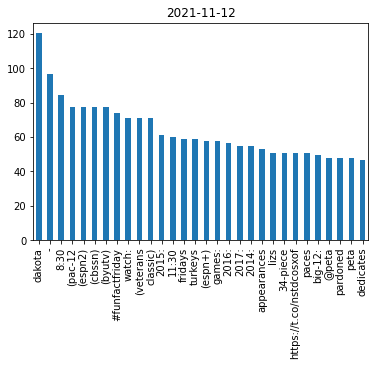

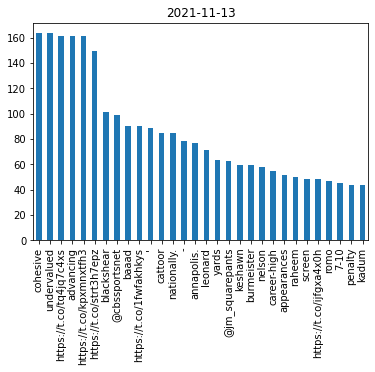

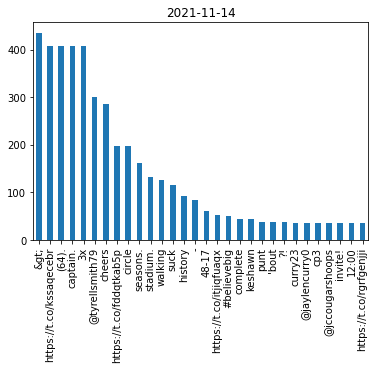

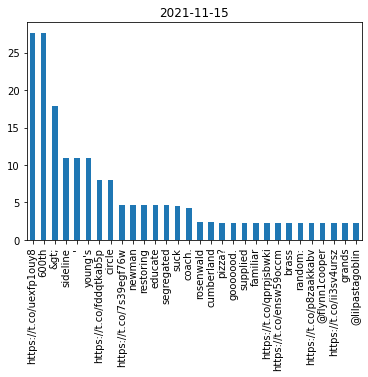

In [195]:
top30s = [TFIDF.loc[idx].sort_values(ascending=False)[:30] for idx in TFIDF.index]
for series in top30s:
    series.plot(kind="bar", title=series.name)
    plt.xticks(rotation=90)
    plt.show()

Now that we have these results plotted, we can go through each day and see what the most common phrases were to make a conclusion on trends or events that occured that day.

#### Day 1: 
On day one (November 6th), there seems to have been a couple of events that occured. First, some of the top words used appear to be related to covid, and after doing a bit of research it seems that on this day Pfizer recieved some promising results from trials on their new anti-viral pill to help treat covid. However, there were no official statements made by VT regarding this pill. The second event that occured seems to have happend the day before. On November 5th, VT football played Boston College, and lost 3-17. With the season already not playing out as expected, fans naturally seemed to have taken their anger and frustrations about the team out on twitter. The two hashtags that appear on the graph also relate to Pitt football, who beat our Hokies 7-28 about 3 weeks prior. This must've been fans comparing the two losses.

#### Day 2:
On day 2, "ct" seems to be the term used the most followed closely by the hashtag "h2p". I am assuming "ct" is short for collegiatetimes which is a Virginia Tech newspaper. There were a few article released on collegiatetimes website on November 7th, so this could be because of different events. One of the articles posted was about a student-athlete walk on campus to raise awareness for racial and social injustices. Another article focuses on Schiffert Health beginning to provide flu shots for the new flu season. In addition to "ct", sports tv channels and other sports related terms suggest November 7th was a big day for sports. This is not very surpirising considering it was Sunday in the middle of the NFL season. In addition to a day of football games, the Hokies mens soccer team played Pitt's mens team, but unfortunatly lost 1-2 in overtime. 

#### Day 3:
On day 3, "ct" seems to be the term used the most by a wide margin. The main Virginia Tech news that came out on November 8th was the planned increase in dining plans for the spring semester. Monday also seemed to have many tweets that were sports related, some about college soccer and football, most likely recapping the events from the weekend and the overtime loss the day prior. There was also one monday night football game that was played on this day. It was between the Steelers and the Bears and I was actually watching this game. From my personal experience, this game was very exciting to watch, and as I scrolled twitter I remember a lot of others felt the same. There were also a few controversial calls that were the topic of discussion on many sports channels the following days.

#### Day 4:
On day 4, November 9th, the college basketball season officially started. This can be guessed from the "marchmaddness" hashtag. In addition, the handle "@TheAndyKatz" belongs to Andy Katz who is a host for march maddness and has a podcast on march maddness. On this day many people were making their way too early predictions for which teams would make the tournament. Lastly, Viginia Tech played Maine starting at 8:00 on this day and won 82-47. 

#### Day 5:
On day 5 it seems most of the tweets were about the basketball game the day before. In addition, citadel seems to have been a popular term used on this day, however after searching I am unable to find the relevance of this on November 10th. 

#### Day 6:
On day 6, November 11th, we celebrated Veterans day. This can be deduced by referring to the 3rd highest term of the day, "#veteransday". In addition to Veterans day, there was also a big talk hosted by Blockchain at Virginia Tech on zoom about blockchain, NFTs, and the creator economy.

#### Day 7:
On day 7, November 12th, a few things happened. The Hokies mens basketball team won their game against Navy 77-57 in Annapolis. The Hokies womens soccer team won their home NCAA Tournament game 3-1 against Ohio State. Peta was also a big topic on this day because of their plea to Pope Francis to go vegan. Lastly, two turkeys from Jasper, Indiana were pardoned by President Biden.

#### Day 8:
On day 8, Saturday November 13th, the hokies football team took on Duke and won easily 48-17. One of the standout stars in this game was Raheem Blackshear who rushed for 117 yards and scored two touchdowns, one rushing and one recieving. Braxton Burmeister and Keshawn King also had great games which is why their names were tweeted a lot on this day. Hunter Catoor, a player on the Hokies basketball team, was also tweeted a lot because of his high scoring performance (19 points) in their game the day before in Annapolis against Navy. 

#### Day 9:
On day 9 not much seemed to happen. Obviously there was Sunday NFL football, but there were not many Hokie tweets about it. What was tweeted about was the football and basketball games from the day before, as well as basketball player Jaylen Curry from J.L. Chambers High School, home of the Cougars, who played in a PhenomHoops AAU tournament and has an offer to play at VT.

#### Day 10:
Day 10 is expected to not have much going on since it was only added due to GMT timestamps. That being said, it is hard to decipher exactly what happened on this day. Most of these tweets were meant to be treated as tweets from day 9, so I will say that what happened on day 10 is the same as on day 9.